# Figure 3

This notebook generates the figures that are used in the 
individual-animal-stability-through-longer-observations
section of the paper

In [2]:
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
get_ipython().magic('matplotlib inline')

In [3]:
import sys
import os

import itertools
import pathlib

import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.optimize import curve_fit


import matplotlib.pyplot as plt
import matplotlib as mpl
#from mpltools import style
import matplotlib.gridspec as gridspec
#from mpltools import layout
#from networkx import Graph
#import seaborn as sns

sys.path.append('..')
import about
import pathcustomize

from waldo.conf import settings
from waldo.wio.experiment import Experiment
from waldo.extern import multiworm 
from multiworm.core import MWTSummaryError
from waldo.output.speed import SpeedWriter
from waldo.output.speed import *
from waldo.wio.worm_writer import WormWriter


plt.style.use('bmh')
about.about()

Python 2.7.9 (default, Apr 14 2015 12:54:25) [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)] on linux2, Host: cody


In [8]:
#settings.PROJECT_DATA_ROOT = '../../data/test'
settings.PROJECT_DATA_ROOT = '/home/projects/worm_movement/Data/WALDO_Data/'

#'../../data/test/20130318_131056/blob_files/'
pl = pathlib.Path(settings.PROJECT_DATA_ROOT)
print(pl.absolute())
files = {}
for i in pl.glob('*'):
    
    summary_list = list(i.glob('blob_files/*.summary'))
    if not len(summary_list):
        continue
    #print(i.name, summary_list[0].name)
    files[i.name] = summary_list[0].name.split('.summary')[0]

names = sorted(list(files.keys()))
for n in names:
    print "'{n}',".format(n=n) , '#  --', files[n]

/home/projects/worm_movement/Data/WALDO_Data
'20130702_135652', #  -- worm tracking test
'20130702_135704', #  -- worm tracking test
'20150512_110456', #  -- copper-10worms-N2-day2-standard
'20150512_110519', #  -- copper-10worms-N2-day2-standard
'20150512_110526', #  -- copper-10worms-N2-day2-standard
'20150514_121513', #  -- copper-10worms-N2-day4-standard_C
'20150514_164204', #  -- copper-10worms-N2-day4-standard_C
'20150515_124728', #  -- copper-10worms-N2-day5-standard_B
'20150515_124736', #  -- copper-10worms-N2-day5-standard_C
'20150515_124840', #  -- copper-10worms-N2-day5-standard_A_Correct
'20150515_155539', #  -- copper-10worms-N2-day5-standard_A
'20150515_155545', #  -- copper-10worms-N2-day5-standard_C
'20150518_121756', #  -- copper-10worms-N2-day1-standard_15degree
'20150518_121757', #  -- copper-10worms-N2-day1-standard_15degree
'20150518_121809', #  -- copper-10worms-N2-day1-standard_15degree
'20150518_182452', #  -- copper-10worms-N2-day1-standard_25degree
'20150518_1

In [9]:
day_1_eids = [  '20130318_131056',
                '20130318_131111',
                '20130318_131113',
                '20130318_142605',
                '20130318_142613',
                '20130318_153741',
                '20130318_153742',
                '20130318_153749',
                '20130318_165642',
                '20130318_165643',
                '20130318_165649']


day_1_eids = [
# '20130702_135652', #  -- worm tracking test
# '20130702_135704', #  -- worm tracking test
# '20150512_110456', #  -- copper-10worms-N2-day2-standard
# '20150512_110519', #  -- copper-10worms-N2-day2-standard
# '20150512_110526', #  -- copper-10worms-N2-day2-standard
# '20150514_121513', #  -- copper-10worms-N2-day4-standard_C
# '20150514_164204', #  -- copper-10worms-N2-day4-standard_C
# '20150515_124728', #  -- copper-10worms-N2-day5-standard_B
# '20150515_124736', #  -- copper-10worms-N2-day5-standard_C
# '20150515_124840', #  -- copper-10worms-N2-day5-standard_A_Correct
# '20150515_155539', #  -- copper-10worms-N2-day5-standard_A
# '20150515_155545', #  -- copper-10worms-N2-day5-standard_C
# '20150518_121756', #  -- copper-10worms-N2-day1-standard_15degree
# '20150518_121757', #  -- copper-10worms-N2-day1-standard_15degree
# '20150518_121809', #  -- copper-10worms-N2-day1-standard_15degree
# '20150518_182452', #  -- copper-10worms-N2-day1-standard_25degree
# '20150518_182454', #  -- copper-10worms-N2-day1-standard_25degree
# '20150518_182501', #  -- copper-10worms-N2-day1-standard_25degree
# '20150519_122411', #  -- copper-10worms-N2-day2-nofood
# '20150519_122420', #  -- copper-10worms-N2-day2-standard
# '20150519_170520', #  -- copper-10worms-N2-day2-standard
# '20150519_170525', #  -- copper-10worms-N2-day2-nofood
# '20150519_170530', #  -- copper-10worms-N2-day2-nofood
# '20150602_112810', #  -- fullday-9worms-N2-day2-groupC
# '20150608_121717', #  -- copper-30worms-N2-day1-standard
'20150608_121725', #  -- copper-10worms-N2-day1-standard
# '20150608_121812', #  -- copper-50worms-N2-day1-standard
# '20150608_165515', #  -- copper-40worms-N2-day1-standard
# '20150608_165523', #  -- copper-60worms-N2-day1-standard
# '20150608_165610', #  -- copper-20worms-N2-day1-standard
# '20150615_124720', #  -- copper-10worms-N2-day1-25degrees
# '20150615_124728', #  -- copper-10worms-N2-day1-25degrees
# '20150615_124738', #  -- copper-10worms-N2-day1-25degrees
# '20150615_170747', #  -- copper-10worms-N2-day1-15degrees
# '20150615_170754', #  -- copper-10worms-N2-day1-15degrees
# '20150615_170759', #  -- copper-10worms-N2-day1-15degrees
'20150629_165904', #  -- copper-10worms-N2-day1-standard             
             ]

In [10]:
def make_cdf(a, maxbins=10000):
    x = np.sort(a)
    y = np.linspace(0, 1, len(a))
    return x, y

In [11]:
def pull_tracks_for_eids(eids, start_time = 0):
    tracks = {}
    for eid in eids:
        print(eid)
        try:
            eid_tracks = pull_track_dfs(eid, start_time=start_time)
            tracks.update(eid_tracks)
            print(eid, '-', len(eid_tracks), 'tracks')
        except MWTSummaryError:
            print(eid, '- skipping')
        except Exception as e:
            print(eid, 'skipped', e)

    print('\n', len(tracks), ' tracks in total')
    return tracks

#d1_NQ67_tracks = pull_tracks_for_eids(eids=day_1_NQ67_eids)
#bids = list(d1_NQ67_tracks.keys())
day_1_eids = pull_tracks_for_eids(eids=day_1_NQ67_eids)
bids = list(day_1_eids.keys())

20130610_151227
('20130610_151227', '- skipping')
20130610_173209
('20130610_173209', '- skipping')
20130617_154227
('20130617_154227', '- skipping')
20130617_175430
('20130617_175430', '- skipping')
('\n', 0, ' tracks in total')


In [6]:
track_dfs = day_1_eids
tdfs = {}
for t in track_dfs:
    df = track_dfs[t]
    df = df[df['minutes'] >= 30].copy()
    
    if df is None or not len(df):
        continue

    t0 = df['time'].iloc[0]
    df['t'] = df['time'] - t0
    df['avg'] = df['bl / s'].cumsum() / np.arange(1, len(df)+1)
    tdfs[t] = df
dfs = tdfs
    

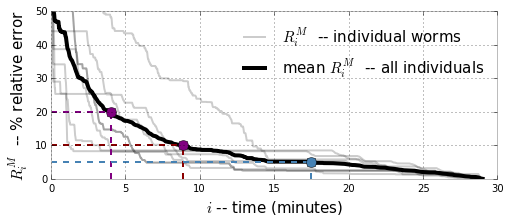

In [14]:
window_size = 60 * 29

compiled_df = compile_error_curves(dfs, window_size=window_size)
plot_compiled(compiled_df)

In [28]:
for i in d.columns:
    print(i)

time
x
y
speed
minutes
bl / s
avg
error
% error
error_window


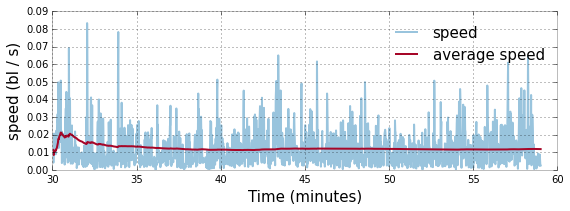

In [33]:
fig = plt.figure(figsize=(8, 3))
ax = plt.subplot(axisbg='white')
ax.plot(d['minutes'], d['bl / s'], alpha=0.5, label='speed')
ax.plot(d['minutes'], d['avg'], label='average speed')

ax.set_xlabel('Time (minutes)', size=15)
ax.set_ylabel('speed (bl / s)', size=15)
ax.legend(loc='best', frameon=False, fontsize =15)

plt.tight_layout()
plt.savefig('example-time-series.png')
plt.show()

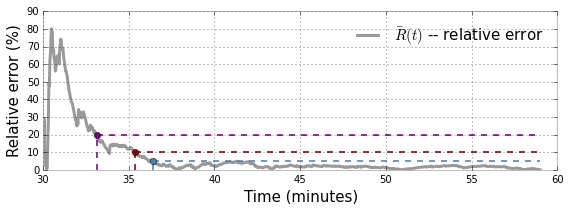

In [20]:
error_series = []
for i ,t in enumerate(dfs):
    df = dfs[t]
    df_window = df[df['t'] <= window_size].copy()
    if df_window is None: 
        continue
    if len(df_window) < 0.9 * window_size: 
        continue
    d = calculate_error_window(df_window).set_index('t')
    break

fig = plt.figure(figsize=(8, 3))
ax = plt.subplot(axisbg='white')
ax.plot(d['minutes'], d['% error'] * 100, 'k', lw=3, alpha=0.4, label=r'$\bar{R}(t)$ -- relative error')
#ax.plot(d['minutes'], d['error_window'] * 100, alpha=0.7, label='$R^M_i$ -- monotonic relative % error')

cross_point10 = np.where(d['error_window'] <= .1)[0][0]
cross_point5 = np.where(d['error_window'] <= .05)[0][0]

def add_crosspoint_line(cross_level, ax, d, color):
    cross_point = np.where(d['error_window'] <= cross_level/100.)[0][0]
    max_minute = np.nanmax(np.array(d['minutes']))
    cross_min = d.iloc[cross_point]['minutes']
    ax.plot([cross_min, max_minute], [cross_level, cross_level], '--', alpha=0.8, color=color)
    ax.plot([cross_min, cross_min], [0, cross_level], '--', alpha=0.8, color=color)
    ax.plot([cross_min], [cross_level], 'o', color=color)
    
add_crosspoint_line(20, ax=ax, d=d, color='purple')
add_crosspoint_line(10, ax=ax, d=d, color='darkred')
add_crosspoint_line(5, ax=ax, d=d, color='steelblue')

ax.set_xlabel('Time (minutes)', size=15)
ax.set_ylabel('Relative error (%)', size=15)
ax.legend(loc='best', frameon=False, fontsize =15)
plt.tight_layout()
plt.savefig('relative-error-decay.png')
plt.show()

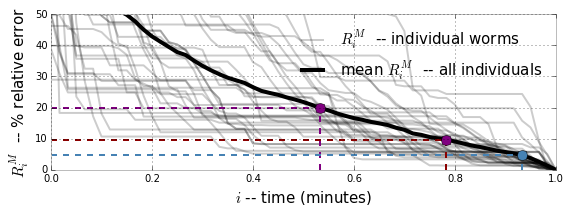

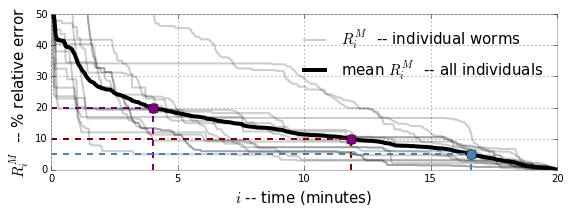

In [10]:
def calculate_error_window(df):
    best_guess =  df['avg'].iloc[-1] 
    df['error'] = np.abs(df['avg'] - best_guess)
    df['% error'] = df['error'] / best_guess
    df['error_window'] = df['% error'].copy()
    for i in range(len(df)):
        df['error_window'].iloc[:-1] = np.nanmax(np.array([df['error_window'].iloc[:-1], df['error_window'].iloc[1:]]), axis=0)
    return df

def compile_error_curves(dfs, window_size = 60):
    error_series = []
    for i ,t in enumerate(dfs):
        df = dfs[t]
        df_window = df[df['t'] <= window_size].copy()
        if df_window is None: 
            continue
        
        if len(df_window) < 0.9 * window_size: 
            continue
        d = calculate_error_window(df_window).set_index('t')['error_window']
        d = d.reindex(np.arange(0, window_size + 1))
        d = d.fillna(method='bfill')
        d = d.fillna(method='ffill')
        d.name = t
        error_series.append(d)
    return pd.concat(error_series, axis=1)

def plot_compiled(df):
    fig = plt.figure(figsize=(8, 3))
    ax = plt.subplot(axisbg='white')
    minutes = np.array(df.index) / 60.0
    mean = compiled_df.mean(axis=1) * 100
    for i, col in enumerate(df):
        if i == 0:
            ax.plot(minutes, df[col] * 100, 'k', alpha=0.2, label='$R^M_i$ -- individual worms')
        ax.plot(minutes, df[col]* 100, 'k', alpha=0.2)
    
    ax.plot(minutes, mean, 'black', lw=4, label='mean $R^M_i$ -- all individuals' )
    
    cross_point20 = np.where(mean <= 20)[0][0] / 60.0
    ax.plot([cross_point20, cross_point20], [0, mean[int(cross_point20 * 60.0)]], '--', color='purple', lw=2)
    ax.plot([0, cross_point20], [mean[int(cross_point20 * 60.0)], mean[int(cross_point20 * 60.0)]], 
            '--', color='purple', lw=2)
    ax.plot([cross_point20], [mean[int(cross_point20 * 60.0)]], 'o', color='purple', markersize=10)

    
    cross_point10 = np.where(mean <= 10)[0][0] / 60.0
    ax.plot([cross_point10, cross_point10], [0, mean[int(cross_point10 * 60.0)]], '--', color='darkred', lw=2)
    ax.plot([0, cross_point10], [mean[int(cross_point10 * 60.0)], mean[int(cross_point10 * 60.0)]], 
            '--', color='darkred', lw=2)
    ax.plot([cross_point10], [mean[int(cross_point10 * 60.0)]], 'o', color='purple', markersize=10)

    
    cross_point5 = np.where(mean <= 5)[0][0] / 60.0
    ax.plot([cross_point5, cross_point5], [0, mean[int(cross_point5 * 60.0)]], '--', color='steelblue', lw=2)
    ax.plot([0, cross_point5], [mean[int(cross_point5 * 60.0)], mean[int(cross_point5 * 60.0)]], '--', color='steelblue', lw=2)
    ax.plot([cross_point5], [mean[int(cross_point5 * 60.0)]], 'o', color='steelblue', markersize=10)
    ax.legend(loc='best', frameon=False, fontsize=15)
    
    ax.set_ylabel('$R^M_i$ -- % relative error', size=15)
    ax.set_xlabel('$i$ -- time (minutes)', size=15)
    ax.set_ylim([0, 50])
    #plt.show()

window_size = 60
compiled_df = compile_error_curves(dfs, window_size=window_size)
plot_compiled(compiled_df)
plt.tight_layout()
plt.savefig('percent_error-1min.png')

window_size = 60 * 20
compiled_df = compile_error_curves(dfs, window_size=window_size)
plot_compiled(compiled_df)
plt.tight_layout()
plt.savefig('percent_error-20min.png')
plt.show()

In [14]:
dfs = tdfs
cp1s2, cp5s2, cp10s2, cp20s2, cp30s2, cp50s2 = [], [], [], [], [], []
percents = [0.05, 0.1, 0.2] #, 0.3, 0.5]
percent_data = {}
windows = np.arange(1, 29)
for w in windows:
    #print(w)
    compiled_df = compile_error_curves(dfs, window_size=w * 60)
    #print compiled_df.shape
    mean = compiled_df.mean(axis=1)
    #print len(mean)
    #print compiled_df.head()
    for percent in percents:
        dat = percent_data.get(percent, [])
        dat.append(np.where(mean < percent)[0][0])
        percent_data[percent] = dat
        
#     cp1s2.append(np.where(mean < 0.01)[0][0])
    cp5s2.append(np.where(mean < 0.05)[0][0])
    cp10s2.append(np.where(mean < 0.1)[0][0])
    cp20s2.append(np.where(mean < 0.2)[0][0])
#     cp30s2.append(np.where(mean < 0.3)[0][0])
#     cp50s2.append(np.where(mean < 0.5)[0][0])

In [112]:
compiled_df.shape

(1201, 14)

In [129]:
ix = np.array([[False, False, False],
              [ True,  True, False],
              [False,  True, False]], dtype=bool)

(array([1, 1, 2]), array([0, 1, 1]))
1 0 True
1 1 True
2 1 True


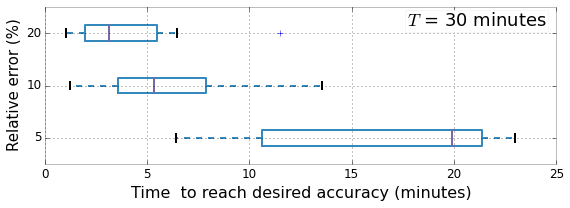

name,20130617_154227-188,20130610_151227-813,20130617_154227-15910,20130617_154227-7608,20130617_175430-828,20130617_154227-5,20130617_154227-22475
5,6.416667,20.86667,19.9,22.96667,21.85,12.31667,8.933333
10,5.35,3.266667,8.166667,1.216667,13.56667,7.566667,3.9
20,3.133333,1.183333,6.466667,1.05,11.5,4.55,2.733333


In [21]:
def calculate_bar_df(compiled_df, percents = [5, 10, 20] ):
    rows = []
    for col in compiled_df:
        row = {'name':col}
        for p in percents:
            w = np.where(compiled_df[col] < p/100.)[0][0] / 60.0
            row[p] = w
        rows.append(row)

    bar_graph_df = pd.DataFrame(rows).T
    bar_graph_df.columns = bar_graph_df.loc['name']
    bar_graph_df = bar_graph_df.loc[percents]
    return bar_graph_df

window_size = 29 * 60
compiled_df = compile_error_curves(dfs, window_size= window_size)
bar_graph_df = calculate_bar_df(compiled_df)

fig = plt.figure(figsize=(8, 3))
ax = plt.subplot(axisbg='white')
bar_graph_df.T.plot(kind='box', vert=False, ax=ax)
#ax.text(14, 3.2, '20 minute window', size=16)#, bbox={'facecolor':'white'})
ax.text(24.5, 3.4, '$T$ = 30 minutes', size=18, 
        horizontalalignment='right', verticalalignment='top', bbox={'facecolor':'white'})

ax.set_xlabel('Time  to reach desired accuracy (minutes)', size=16)
ax.set_ylabel('Relative error (%)', size=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.savefig('convergence-boxplot-horiz.png')
plt.show()
bar_graph_df

In [16]:
windows = np.arange(1, 29)
mean_rows = []
median_rows = []

for w in windows:
    #print(w)
    compiled_df = compile_error_curves(dfs, window_size=w * 60)
    bar_graph_df = calculate_bar_df(compiled_df)
    means = bar_graph_df.mean(axis=1)
    means.name = w
    mean_rows.append(means)
    
    med = bar_graph_df.median(axis=1)
    med.name = w
    median_rows.append(med)
mean_convergence_df = pd.concat(mean_rows, axis=1)
median_convergence_df = pd.concat(median_rows, axis=1)

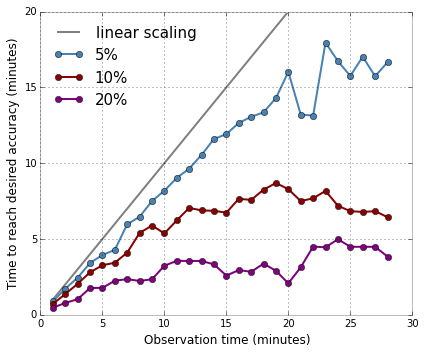

In [35]:
wc = median_convergence_df.copy()
#wc = mean_convergence_df.copy()

wc.index = ['5%', '10%', '20%']
wc = wc.T

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(axisbg='white')
ax.plot(wc.index, wc.index, 'k-', label='linear scaling', alpha=0.5)
colors = ['steelblue', 'darkred', 'purple']
for col, color in zip(wc, colors):
    ax.plot(wc.index, wc[col], 'o-', label=col, color=color)

ax.legend(loc='best', frameon=False, fontsize=15)
ax.set_xlabel('Observation time (minutes)')
ax.set_ylabel('Time to reach desired accuracy (minutes)')
ax.set_ylim([0, 20])
#ax.set_xlim([0, 50])

#ax.semilogy()
#ax.semilogx()
#plt.tight_layout()
plt.savefig('convergence_percent2-median-lin.png')
plt.show()   

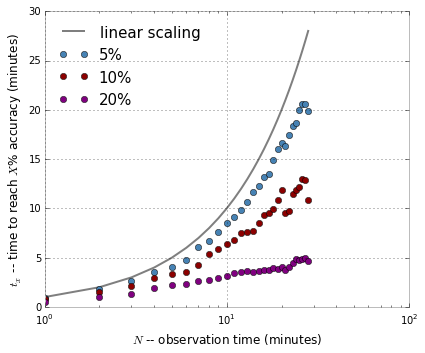

In [229]:
fig = plt.figure(figsize=(6, 5))

ax = plt.subplot(axisbg='white')
# for percent in percents:
#     if percent > 0.45:
#         pass
#         #break
#     ax.plot(windows, np.array(percent_data[percent], dtype=float) / 60, 'o-', label='{p}%'.format(p=percent*100))

    
# ax.plot(windows, np.array(cp1s2, dtype=float) / windows / 60, 'o-', label='1%')
ax.plot(windows, windows, 'k-', label='linear scaling', alpha=0.5)
ax.plot(windows, np.array(cp5s2, dtype=float) / 60, 'o', label='5%', color='steelblue')
ax.plot(windows, np.array(cp10s2, dtype=float) /60, 'o', label='10%', color='darkred')
ax.plot(windows, np.array(cp20s2, dtype=float) / 60, 'o', label='20%', color='purple')
# ax.plot(windows, np.array(cp30s2, dtype=float) / windows / 60, 'o-', label='30%')
# ax.plot(windows, np.array(cp50s2, dtype=float) / windows / 60, 'o-', label='50%')


ax.legend(loc='best', fontsize=15, frameon=False)
ax.set_xlabel('$N$ -- observation time (minutes)')
ax.set_ylabel('$t_x$ -- time to reach $X$% accuracy (minutes)')
#ax.set_ylim([0, 1])
#ax.semilogy()
ax.semilogx()
plt.tight_layout()
plt.savefig('convergence_percent.png')
plt.show()    


In [22]:
def calculate_error_window2(df):
    best_guess =  df['avg'].iloc[-1] 
    df['error'] = np.abs(df['avg'] - best_guess)
    df['% error'] = df['error']
    df['error_window'] = df['% error'].copy()
    for i in range(len(df)):
        df['error_window'].iloc[:-1] = np.nanmax(np.array([df['error_window'].iloc[:-1], df['error_window'].iloc[1:]]), axis=0)
    return df

def compile_error_curves2(dfs, window_size = 60):
    error_series = []
    for i ,t in enumerate(dfs):
        df = tdfs[t]
        df_window = df[df['t'] <= window_size].copy()
        if df_window is None: 
            continue
        
        if len(df_window) < 0.9 * window_size: 
            continue
        d = calculate_error_window2(df_window).set_index('t')['error_window']
        d = d.reindex(np.arange(0, window_size + 1))
        d = d.fillna(method='bfill')
        d = d.fillna(method='ffill')
        d.name = t
        error_series.append(d)
    return pd.concat(error_series, axis=1)

def plot_compiled2(df):
    fig = plt.figure(figsize=(10, 3))
    ax = plt.subplot(axisbg='white')
    minutes = np.array(df.index) / 60.0
    mean = compiled_df.mean(axis=1)
    for col in df:
        ax.plot(minutes, df[col], 'k', alpha=0.5)
    
    ax.plot(minutes, mean, 'orange', lw=3)
    
    cross_point10 = np.where(mean < 0.001)[0][0] / 60.0
    ax.plot([cross_point10, cross_point10], [0, 0.5], color='steelblue', lw=2)
    
    cross_point5 = np.where(mean < 0.005)[0][0] / 60.0
    ax.plot([cross_point5, cross_point5], [0, 0.5], color='darkred', lw=2)
    
    cross_point5 = np.where(mean < 0.01)[0][0] / 60.0
    ax.plot([cross_point5, cross_point5], [0, 0.5], color='green', lw=2)
    
    ax.set_ylabel('error (bl / s)')
    ax.set_xlabel('time (minutes)')
    ax.set_ylim([0, 0.06])
    plt.show()
    
    
dfs = tdfs
aa, bb, cc, dd, ee = [], [], [], [], []
windows2 = np.arange(1, 29)
for w in windows2:
    compiled_df = compile_error_curves2(dfs, window_size=w * 60)
    mean = compiled_df.mean(axis=1)
    aa.append(np.where(mean < 0.001)[0][0])
    bb.append(np.where(mean < 0.002)[0][0])
    cc.append(np.where(mean < 0.003)[0][0])
    dd.append(np.where(mean < 0.005)[0][0])
    ee.append(np.where(mean < 0.01)[0][0]) 

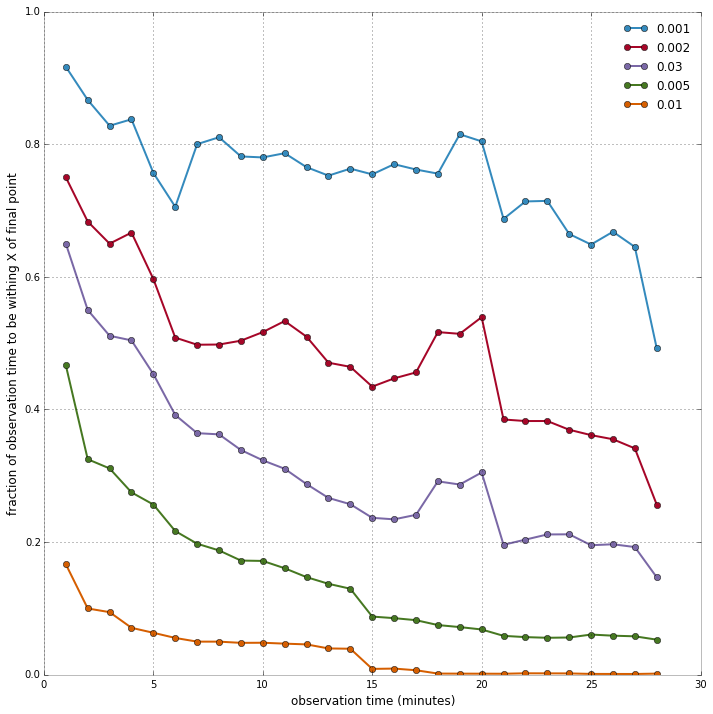

In [41]:
fig = plt.figure(figsize=(10, 10))

ax = plt.subplot(axisbg='white')
ax.plot(windows2, np.array(aa, dtype=float) / windows2 / 60, 'o-', label='0.001')
ax.plot(windows2, np.array(bb, dtype=float) / windows2 /60, 'o-', label='0.002')
ax.plot(windows2, np.array(cc, dtype=float) / windows2 / 60, 'o-', label='0.03')
ax.plot(windows2, np.array(dd, dtype=float) / windows2 /60, 'o-', label='0.005')
ax.plot(windows2, np.array(ee, dtype=float) / windows2 / 60, 'o-', label='0.01')

ax.legend(loc='best', frameon=False)
ax.set_xlabel('observation time (minutes)')
ax.set_ylabel('fraction of observation time to be withing X of final point')
#ax.set_ylim([0, 1])
#ax.semilogy()
plt.tight_layout()
plt.savefig('convergence_absolute.png')
plt.show()   

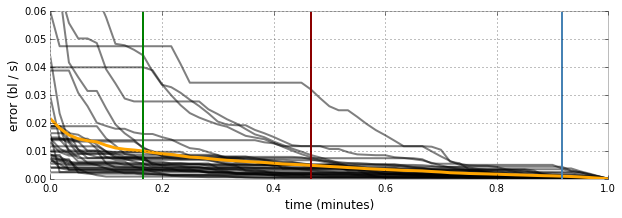

5.0


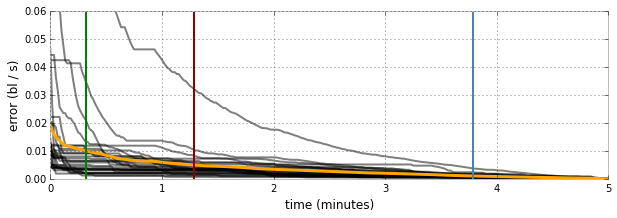

10.0


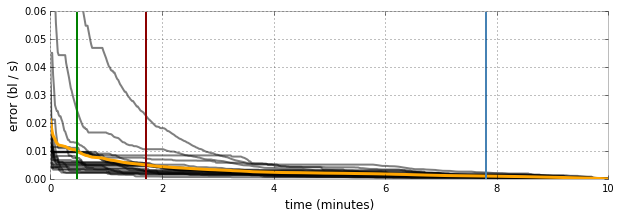

15.0


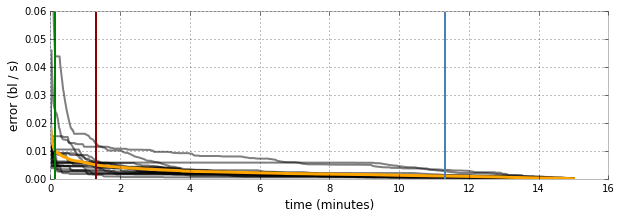

20.0


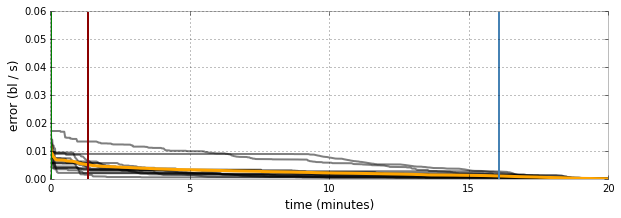

In [105]:
dfs = tdfs
ws2 = []
e005s, e01s, e02s = [], [], []

window_size = 60
compiled_df = compile_error_curves2(dfs, window_size=window_size)
plot_compiled2(compiled_df)

mean = compiled_df.mean(axis=1)
ws2.append(window_size)
e005s.append(np.where(mean < 0.001)[0][0])
e01s.append(np.where(mean < 0.005)[0][0])
e02s.append(np.where(mean < 0.01)[0][0])

window_size = 60 * 5
print window_size / 60.0
compiled_df = compile_error_curves2(dfs, window_size=window_size)
plot_compiled2(compiled_df)

mean = compiled_df.mean(axis=1)
ws2.append(window_size)
e005s.append(np.where(mean < 0.001)[0][0])
e01s.append(np.where(mean < 0.005)[0][0])
e02s.append(np.where(mean < 0.01)[0][0])


window_size = 60 * 10
print window_size / 60.0

compiled_df = compile_error_curves2(dfs, window_size=window_size)
plot_compiled2(compiled_df)

mean = compiled_df.mean(axis=1)
ws2.append(window_size)
e005s.append(np.where(mean < 0.001)[0][0])
e01s.append(np.where(mean < 0.005)[0][0])
e02s.append(np.where(mean < 0.01)[0][0])


window_size = 60 * 15
print window_size / 60.0
compiled_df = compile_error_curves2(dfs, window_size=window_size)
plot_compiled2(compiled_df)

mean = compiled_df.mean(axis=1)
ws2.append(window_size)
e005s.append(np.where(mean < 0.001)[0][0])
e01s.append(np.where(mean < 0.005)[0][0])
e02s.append(np.where(mean < 0.01)[0][0])

window_size = 60 * 20
print window_size / 60.0
compiled_df = compile_error_curves2(dfs, window_size=window_size)
plot_compiled2(compiled_df)

mean = compiled_df.mean(axis=1)
ws2.append(window_size)
e005s.append(np.where(mean < 0.001)[0][0])
e01s.append(np.where(mean < 0.005)[0][0])
e02s.append(np.where(mean < 0.01)[0][0])

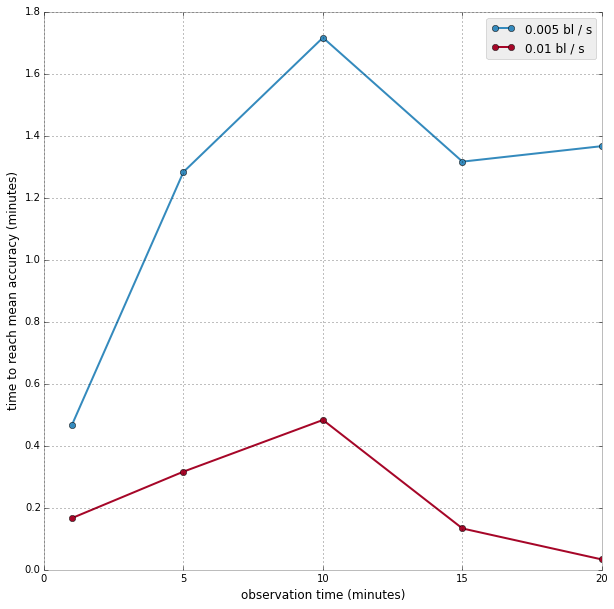

In [109]:
ws_min = np.array(ws2) / 60.0

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(axisbg='white')
#ax.plot(ws_min, np.array(e005s) / 60.0, 'o-', label='0.001 bl / s')
ax.plot(ws_min, np.array(e01s) / 60.0, 'o-', label='0.005 bl / s')
ax.plot(ws_min, np.array(e02s) / 60.0, 'o-', label='0.01 bl / s')

ax.legend(loc='best')
ax.set_xlabel('observation time (minutes)')
ax.set_ylabel('time to reach mean accuracy (minutes)')

plt.show()

In [75]:
compiled_df.T[60*15]

20130617_154227-188      0.046240
20130617_154227-25332    0.177220
20130610_151227-813      0.075871
20130617_154227-15910    0.033515
20130617_154227-7608     0.053050
20130610_151227-35       0.202094
20130617_175430-828      0.061734
20130617_154227-5        0.036582
20130617_154227-22475    0.028163
Name: 900, dtype: float64

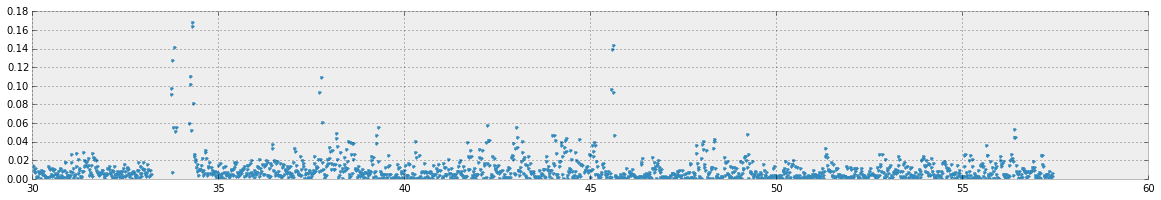

In [78]:
d = dfs['20130610_151227-785']
#d = dfs['20130617_175430-828']
#d = dfs['20130617_154227-28233']
d = dfs['20130610_151227-35']

fig, ax = plt.subplots(figsize=(20,3))
ax.plot(d['minutes'], d['bl / s'], '.')
plt.show()

In [6]:
def expon_func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [8]:
def fit_decay_time(track_dfs, plot=True, savename=None):

    def expon_func(x, a, b, c):
        return a * np.exp(-b * x) + c

    # assemble all dataframes into one big df.
    full_data = [df for bid, df in track_dfs.items()]
    fdf = pd.concat(full_data, axis=0)
    fdf['m'] = np.array(fdf['minutes'], dtype=int)

    avg = pd.pivot_table(fdf, values='bl / s', cols='m', aggfunc=np.mean)
    counts = pd.pivot_table(fdf, values='bl / s', cols='m', aggfunc=len)

    x = np.array(avg.index) + 0.5
    y = np.array(avg)

    params, pcov = curve_fit(expon_func, x, y)

    if plot:

        fig = plt.figure(figsize=(10,5))
        ax = plt.subplot(axisbg='white')
        #ax.plot(fdf['minutes'], fdf['bl / s'], '.', alpha=0.1, label="Origional Data")
        ax.plot(x, y, 'o', label="Binned Data", color='steelblue', alpha=0.5)
        ax.plot(x, expon_func(x, *params), '-', color='k', label="Fitted Curve")
        ax.set_ylim([0, 0.2])
        ax.legend(fontsize=15)
        ax.set_xlabel('time (min)', size=20)
        ax.set_ylabel('speed (bl / s)', size=20)
        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)
        if savename is not None:
            plt.savefig(savename)
        plt.show()

        fig = plt.figure(figsize=(10,3))
        ax = plt.subplot(axisbg='white')
        #fig, ax = plt.subplots(figsize=(10,3))
        x = np.array(counts.index)
        y = np.array(counts)

        ax.plot(x, y, 'k.-', label="Binned Data")
        ax.legend(loc='best', fontsize=15)
        ax.set_xlabel('time (min)', size=20)
        ax.set_ylabel('counts', size=20)
        ax.set_ylim([0, max(y)*1.1])

        plt.yticks(fontsize=15)
        plt.xticks(fontsize=15)

        plt.show()
    return fdf, params, pcov

def plot_decay(track_dfs):
    fdf, params, pcov = fit_decay_time(track_dfs)
    print(pcov)
    print
    print('a * np.exp(-b * x) + c')
    a,b,c = params
    print 'a = {a}'.format(a=round(a, 3))
    print 'b = {b}'.format(b=round(b, 3))
    print 'c = {c}'.format(c=round(c, 3))
    tau = 1/b
    print 
    print 'tau = 1/b = {t} minutes'.format(t=round(tau, 3))
    print 
    print 'previously reported tau is 19 min - Yemini, Jucikas, ... Schafer (2013)'
    return params
    
#track_dfs = d1_NQ67_tracks
track_dfs = day_1_eids
params = plot_decay(track_dfs)

#fdf, params, pcov = fit_decay_time(track_dfs, savename='group-speed-decay-d1-nq67.eps')

TypeError: pivot_table() got an unexpected keyword argument 'cols'

In [38]:
track_dfs = d1_NQ67_tracks
fdf, params, pcov = fit_decay_time(track_dfs, plot=False)
track_ids = list(track_dfs.keys())

20130617_154227-188


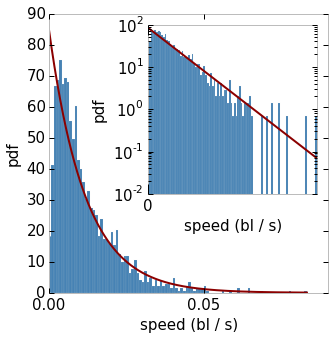

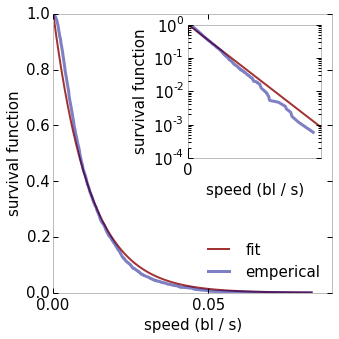

In [12]:
def distribution_fit_insert(df, start_t=30, insert_shift=0.4, track_id=''):
    
    df = df[df['minutes'] > start_t]
    s = np.array(df['bl / s'])
    
    fig = plt.figure(figsize=(5, 5))
    x = np.linspace(min(s), max(s), 1000)
    loc, scale = stats.expon.fit(s)
    dist = stats.expon(loc=loc, scale=scale)

    ax = plt.subplot(axisbg='white')
    ax.hist(s, bins=100, normed=True, color='steelblue', lw=0.1)
    ax.plot(x, dist.pdf(x), color='darkred', lw=2)
    ax.set_xlabel('speed (bl / s)', fontsize=15)
    ax.set_ylabel('pdf', fontsize=15)
    ax.yaxis.set_tick_params('major', length=5, width=1)
    ax.xaxis.set_tick_params('major', length=5, width=1)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.grid(b=False)

    p = insert_shift
    ax2 = plt.axes([p, p, .87-p, .87-p], axisbg='w')
    ax2.hist(s, bins=100, normed=True, color='steelblue', lw=0.1)
    ax2.plot(x, dist.pdf(x), color='darkred', lw=2)
    ax2.set_yscale('log')
    ax2.set_ylabel('pdf', fontsize=15)
    ax2.set_xlabel('speed (bl / s)', fontsize=15)
    ax2.set_xlim([0, min([0.22, max(s)])])

    ax2.xaxis.set_tick_params(length=10, width=1)
    ax2.yaxis.set_tick_params('major', length=5, width=1)
    ax2.yaxis.set_tick_params('minor', length=3, width=1)
    ax2.grid(b=False)

    xtick_values = [i for i in [0, 0.05, 0.1, 0.15, 0.2, 0.25]
                    if i < max(s)]

    plt.setp(ax2, xticks=xtick_values[:- 1])
    plt.setp(ax, xticks=xtick_values)

    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig('expon-fit-insert-{t}.eps'.format(t=track_id))

    plt.show()

def distribution_fit_survival_insert(df, start_t=30, insert_shift=0.5, track_id='', insert=True):
    
    df = df[df['minutes'] > start_t]
    s = np.array(df['bl / s'])

    fig = plt.figure(figsize=(5, 5))
    x = np.linspace(min(s), max(s), 1000)
    loc, scale = stats.expon.fit(s)
    dist = stats.expon(loc=loc, scale=scale)

    ax = plt.subplot(axisbg='white')
    sx, sy = make_cdf(s) 
    ax.plot(x, dist.sf(x), color='darkred', lw=2, alpha=0.8, label='fit')

    ax.plot(sx, 1.0 - np.array(sy), color='darkblue', lw=3.0, alpha=0.5, label='emperical')
    #ax.hist(s, bins=100, normed=True, color='steelblue', lw=0.1)
    ax.set_xlabel('speed (bl / s)', fontsize=15)
    ax.set_ylabel('survival function', fontsize=15)
    ax.yaxis.set_tick_params('major', length=5, width=1)
    ax.xaxis.set_tick_params('major', length=5, width=1)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    ax.grid(b=False)
    ax.legend(loc='lower right', frameon=False, fontsize=15)
    
    xtick_values = [i for i in [0, 0.05, 0.1, 0.15, 0.2, 0.25]
                    if i < max(s)]   
    
    
    if insert:
        p = insert_shift
        ax2 = plt.axes([p, p, .87-p, .87-p], axisbg='w')
        #ax2.hist(s, bins=100, normed=True, color='steelblue', lw=0.1)
        ax2.plot(x, dist.sf(x), color='darkred', lw=2, alpha=0.8, label='fit')

        sx, sy = make_cdf(s) 
        ax2.plot(sx[:-1], (1.0 - np.array(sy))[:-1], color='darkblue', lw=3.0, alpha=0.5, label='data')

        ax2.set_yscale('log')
        ax2.set_ylabel('survival function', fontsize=15)
        ax2.set_xlabel('speed (bl / s)', fontsize=15)
        ax2.set_xlim([0, min([0.22, max(s)])])

        ax2.xaxis.set_tick_params(length=10, width=1)
        ax2.yaxis.set_tick_params('major', length=5, width=1)
        ax2.yaxis.set_tick_params('minor', length=3, width=1)
        ax2.grid(b=False)

        plt.setp(ax2, xticks=xtick_values[::2])
    else:
        track_id

        
    plt.setp(ax, xticks=xtick_values)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    
    if insert:
        insert_string = 'insert-'
    else:
        insert_string = ''
    plt.savefig('expon-fit-survival-{i}{t}.eps'.format(i=insert_string, t=track_id))
    #plt.savefig('expon-fit-survival-insert.pdf')
    plt.show()
    
bid = track_ids[1]
print(bid)
#print track_dfs[bid]
#bid = '20130318_131113-20'
#df = d1_n2_tracks[bid]
distribution_fit_insert(df=track_dfs[bid])
distribution_fit_survival_insert(df=track_dfs[bid])

In [13]:
def plot_single_and_global_decay(track_dfs, fdf, params, track_id, save_as='eps'):
    df = track_dfs[track_id]
    df2 = pd.rolling_mean(df, window=60)

    avg = pd.pivot_table(fdf, values='bl / s', cols='m', aggfunc=np.mean)
    counts = pd.pivot_table(fdf, values='bl / s', cols='m', aggfunc=len)

    x = np.array(avg.index) + 0.5
    y = np.array(avg)
    
    fig = plt.figure(figsize=(10,5))
    ax = plt.subplot(axisbg='white')
    #ax.plot(fdf['minutes'], fdf['bl / s'], '.', alpha=0.1, label="Origional Data")
    #ax.plot(df['minutes'], df['bl / s'], '.', alpha=0.5, label='single worm') #, color='steelblue'

    ax.plot(df['minutes'], df['bl / s'], '-', alpha=0.3, label='Single Individual', color='steelblue')
    ax.plot(df2['minutes'], df2['bl / s'], '-', alpha=0.5, label='Single Individual -- Rolling Average', color='k')

    ax.plot(x, y, 'o', alpha=0.8, label="All Animals -- Binned Data", color='tomato')
    ax.plot(x, expon_func(x, *params), '-', lw=4, label="All Animals -- Fitted Curve", color='k',)
    ax.plot(x, y, 'o', alpha=0.8, color='tomato')


    ax.set_ylim([0, 0.2])
    legend = ax.legend(fontsize=15)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    #frame.set_edgecolor('red')

    ax.set_xlabel('time (min)', size=20)
    ax.set_ylabel('speed (bl / s)', size=20)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    if save_as is not None:
        savename = 'single_global_decay-{t}.{sa}'.format(t=track_id, sa=save_as)
        plt.savefig(savename)
    plt.show()
    
# track_id = '20130318_142605-87'
# print track_id
# plot_single_and_global_decay(track_dfs, fdf, params, track_id)
# distribution_fit_insert(df=track_dfs[track_id], track_id=track_id)
# distribution_fit_survival_insert(df=track_dfs[track_id], track_id=track_id)
# distribution_fit_survival_insert(df=track_dfs[track_id], track_id=track_id, insert=False)


# #track_id = '20130322_130411-10'
# #track_id = '20130318_131113-10'
# track_id = '20130318_153742-8'
# print track_id
# plot_single_and_global_decay(track_dfs, fdf, params, track_id)
# distribution_fit_insert(df=track_dfs[track_id], track_id=track_id)
# distribution_fit_survival_insert(df=track_dfs[track_id], track_id=track_id)
# distribution_fit_survival_insert(df=track_dfs[track_id], track_id=track_id, insert=False)


# track_id = '20130318_142605-178'
# print track_id
# plot_single_and_global_decay(track_dfs, fdf, params, track_id)
# distribution_fit_insert(df=track_dfs[track_id], track_id=track_id)
# distribution_fit_survival_insert(df=track_dfs[track_id], track_id=track_id)
# distribution_fit_survival_insert(df=track_dfs[track_id], track_id=track_id, insert=False)


20130617_154227-188


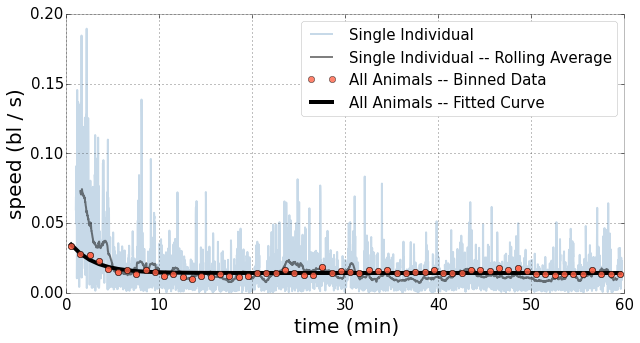

20130617_154227-7608


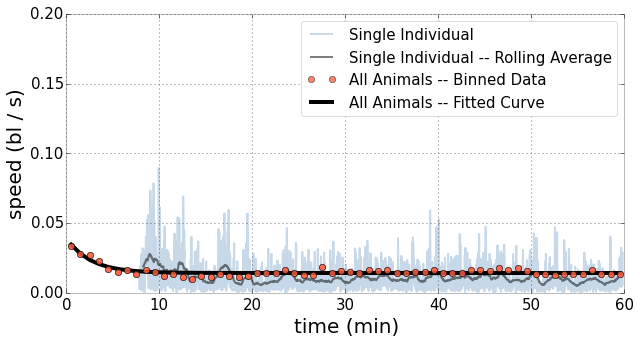

20130617_154227-5


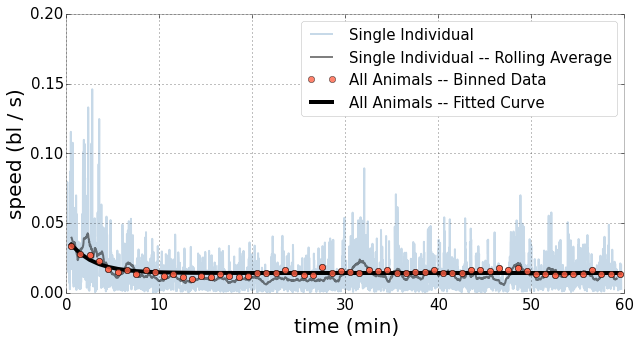

20130610_151227-35


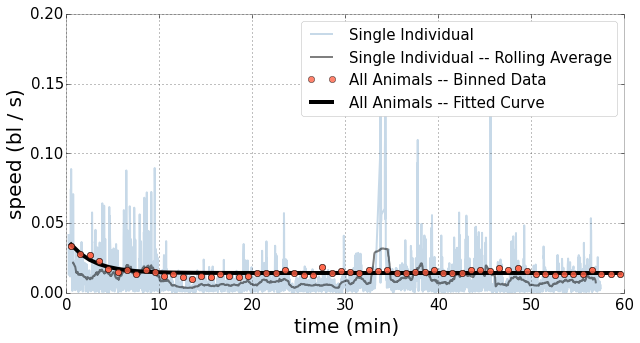

In [15]:
for track in track_ids:
    df = track_dfs[track]
    #print('track: {bid} \t| len:{l}'.format(bid=bid, l=len(df)))
    #fig = plt.figure(figsize=(10, 1))
    start_time, end_time = min(df['minutes']), max(df['minutes'])
    if end_time - start_time < 45:
        continue
    if start_time > 10:
        continue
    s = df['bl / s']
    if max(s) < 0.05:
        continue
        
    print track
    track_id = track
    plot_single_and_global_decay(track_dfs, fdf, params, track_id) #, save_as='png')

(1970, 2100)

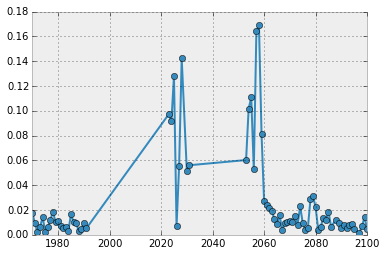

In [22]:
bid = '20130610_151227-35'
df = track_dfs[bid]
fig, ax = plt.subplots()
ax.plot(df['time'], df['bl / s'], 'o-')
ax.set_xlim([1970, 2100])

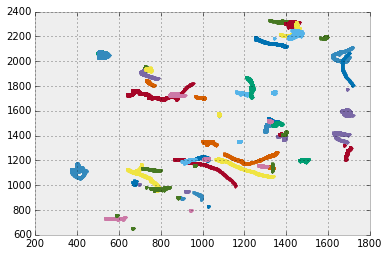

In [41]:

fig, ax = plt.subplots()
for t in track_dfs:
    df = track_dfs[t]
    ax.plot(df['x'], df['y'], '.')
    
# ax.set_xlim([1970, 2100])

/home/visitors/peterwinter/.pyenv/versions/general/local/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/visitors/peterwinter/.pyenv/versions/general/local/lib/python2.7/site-packages/numpy/core/_methods.py:83: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


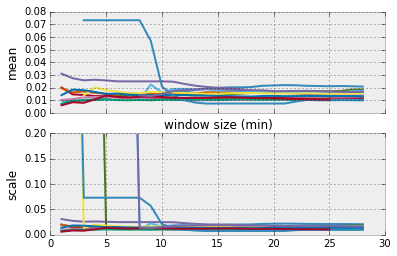

In [26]:
def fit_scales(sdf, start_t=30, min_window=5, min_track_time=20):
    
    df = sdf[sdf['minutes'] > start_t]
    #print(len(sdf), 'points in full series')
    #print(len(df), 'points after', start_t, 'minutes')
    if not len(df):
        return None
    min_time, max_time = min(df['minutes']), max(df['minutes'])
    if max_time - min_time < min_track_time:
        return None
    
    last_t = round(max_time)
    #print(last_t)
    start_t = min([min_time, start_t])
    
    max_window = last_t - min_window - start_t
    windows = np.arange(min_window, max_window, 1)
    scales = []
    counts = []
    means = []
    stds = []
    
    for w in windows:
        d = df[df['minutes'] <= (start_t + w)]
        s = np.array(d['bl / s'])
        loc, scale = stats.expon.fit(s, floc=0.0)
        scales.append(scale)
        counts.append(len(s))
        means.append(np.mean(s))
        stds.append(np.std(s))
    return windows, scales, counts, means, stds

windows = {}
scales = {}
counts = {}
stds = {}
means = {}

start_t = 30
min_track_time = 20
min_window = 1

fig, (ax, ax1) = plt.subplots(2, 1, sharex=True)

for i, (track, df) in enumerate(track_dfs.items()):
    fits = fit_scales(df, start_t=start_t, 
                      min_window=min_window, 
                      min_track_time=min_track_time)
    if fits is None:
        continue
    #print track
    w, s, c, mean, std = fits
    s = np.array(s)
    
    ax.plot(w, np.array(mean))
    ax1.plot(w, s)
    
    windows[track] = w
    scales[track] = s
    counts[track] = c
    means[track] = mean
    stds[track] = std
    
    #ax[2].plot(windows, counts)
#ax[0].set_ylabel('scale factor')
ax.set_ylabel('mean')
ax1.set_ylabel('scale')
ax1.set_ylim([0, 0.2])
#ax[2].set_ylabel('$d$ scale factor - final')
ax.set_xlabel('window size (min)')
#fig, ax = plt.subplots()
#ax.plot(speed)
#ax.set_ylabel('$bl / s$')
#ax.set_xlabel('time')
#ax.set_xlim([0, len(speed)])
plt.savefig('scale-factor-v-window-size.png')
plt.show()

In [43]:
for i, (track, df) in enumerate(track_dfs.items()):
    break
df

[autoreload of numpy.compat failed: Traceback (most recent call last):
  File "/home/visitors/peterwinter/.pyenv/versions/general/local/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name _inspect
]
[autoreload of numpy.core failed: Traceback (most recent call last):
  File "/home/visitors/peterwinter/.pyenv/versions/general/local/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: cannot import name multiarray
]
[autoreload of pandas.tseries.api failed: Traceback (most recent call last):
  File "/home/visitors/peterwinter/.pyenv/versions/general/local/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
AttributeError: 'module' object has no attribute 'Timedelta'
]
[autoreload of pandas.io.parsers failed: Traceback (most

cannot import name hashtable



/home/visitors/peterwinter/.pyenv/versions/general/local/lib/python2.7/site-packages/IPython/core/formatters.py:239: FormatterWarning: Exception in text/html formatter: "No such keys(s): 'display.notebook_repr_html'"
  FormatterWarning,


<repr(<pandas.core.frame.DataFrame at 0x7f9c6286d7d0>) failed: pandas.core.config.OptionError: "No such keys(s): 'display.encoding'">

20130610_151227-813


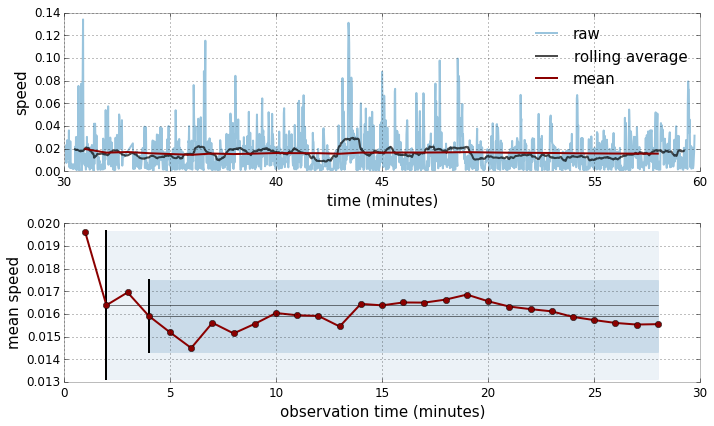

20130617_154227-7608


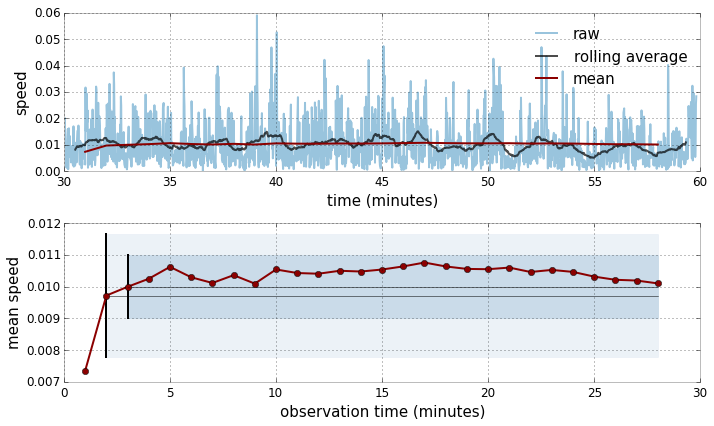

20130617_175430-1600


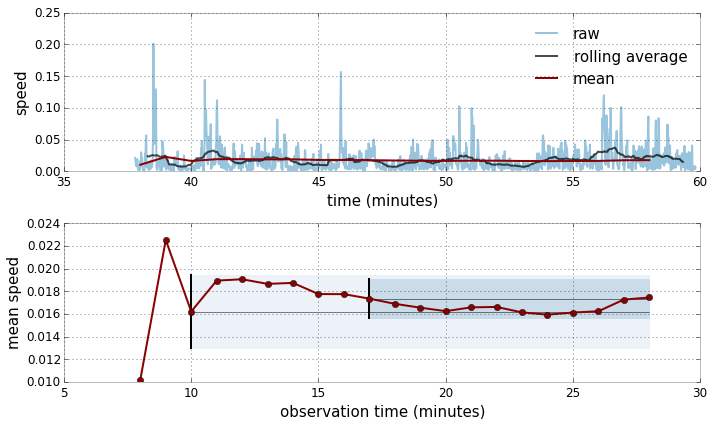

20130617_154227-15910


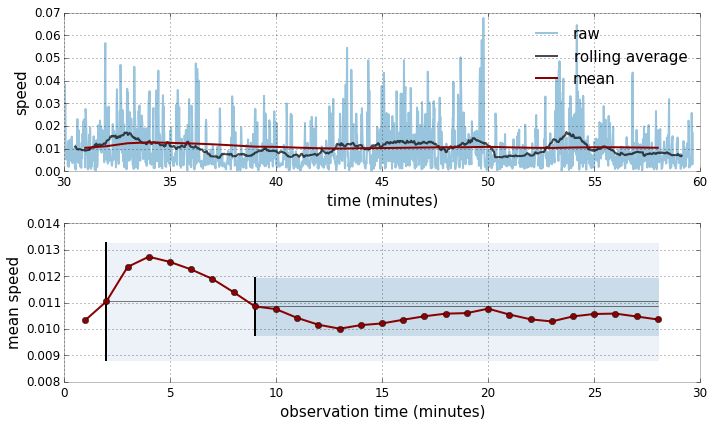

20130617_175430-828


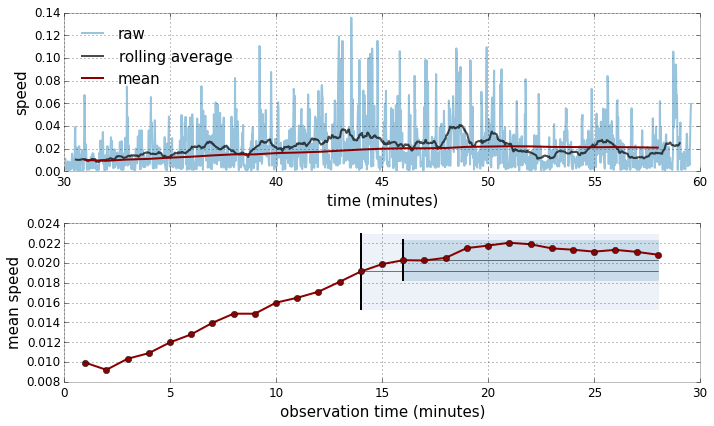

20130610_151227-785


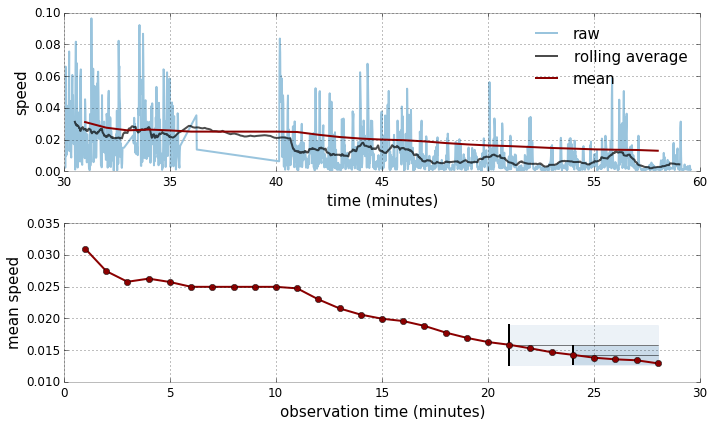

20130617_154227-188


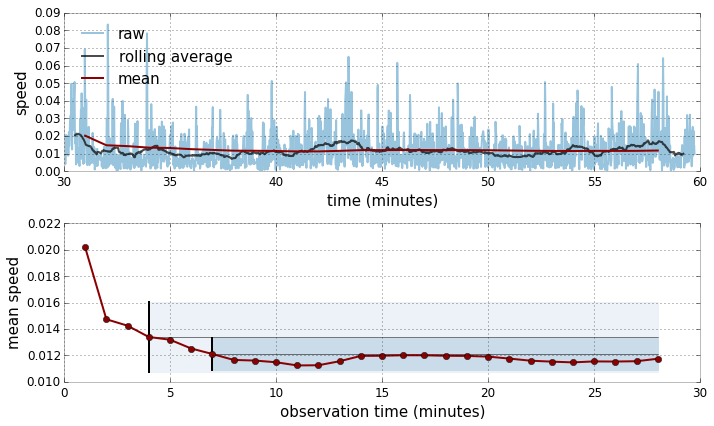

20130610_151227-952


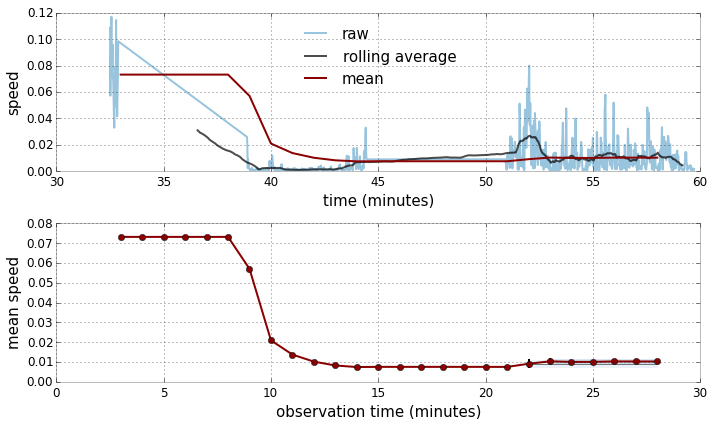

20130617_154227-5


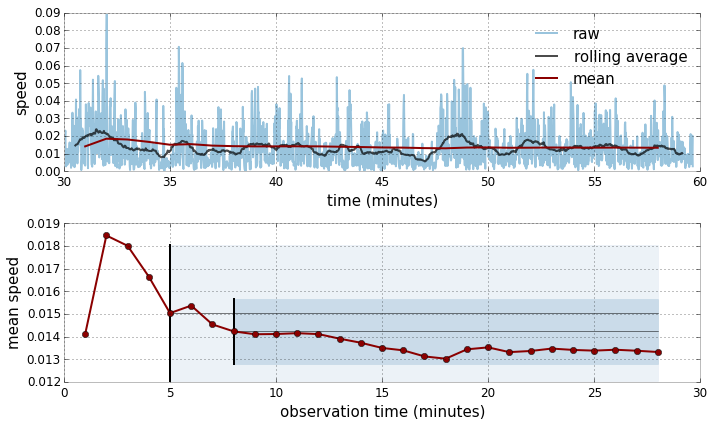

20130617_154227-22475


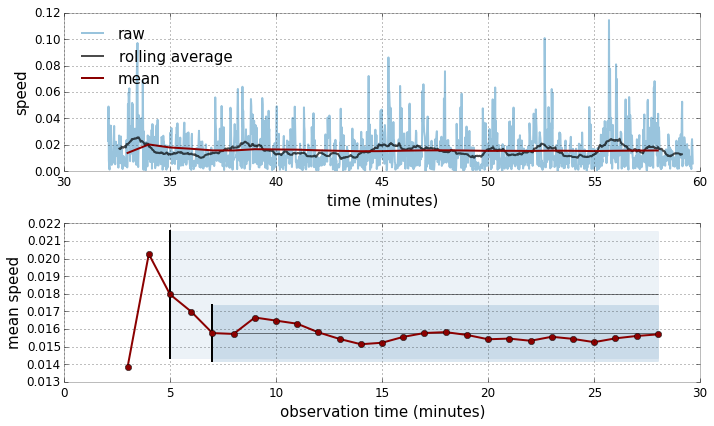

20130610_151227-35


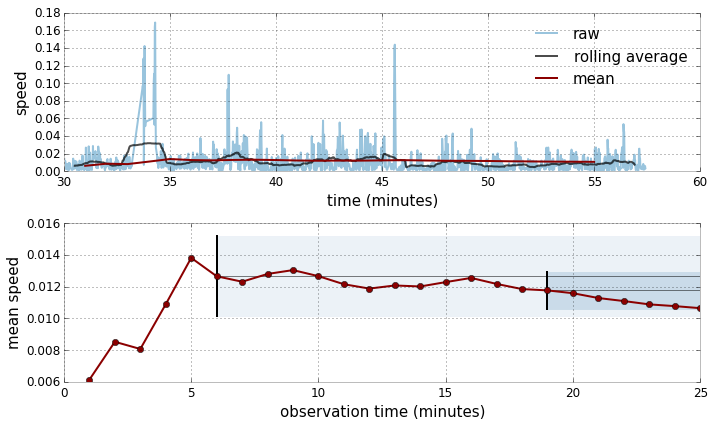

20130610_151227-1208


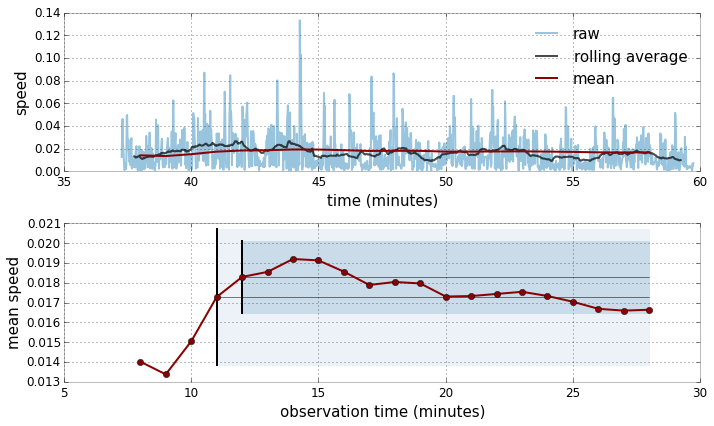

20130617_154227-25332


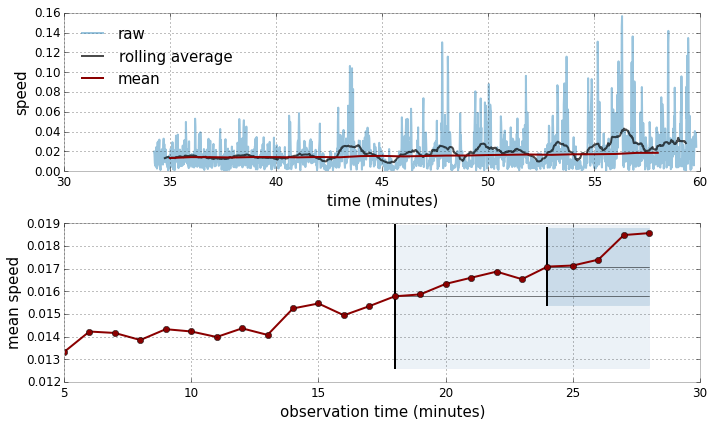

In [34]:
def check_stability(x, y, closeness):
    #lower, upper = [], []
    null_hyp = []
    reject = []
    first_pass = None
    last_fail = None
    for pos in range(len(x)):
        segment = y[pos:]
        segment_x = x[pos:]
        #print segment

        current = y[pos]
        if np.isnan(current):
            continue
        l = current * (1.0 - (closeness / 1.0))
        u = current * (1.0 + (closeness / 1.0 ))
        if max(segment) > u or min(segment) < l:
            reject.append((x[pos], y[pos]))
        else:          
            null_hyp.append((x[pos], y[pos]))
            if first_pass == None:
                first_pass = (x[pos], y[pos], l, u) 
                
        if first_pass == None:
            last_fail = (x[pos], y[pos], l, u)   
    return null_hyp, reject, first_pass, last_fail

def within_percent_of_current3(x, y, df, bid, save_as=None):

    fig = plt.figure(figsize=(10, 6))
    ax = plt.subplot(211, axisbg='white')

    df = df[df['minutes'] > 30]
    df2 = pd.rolling_mean(df, window=60)

    ax.plot(df['minutes'], df['bl / s'], alpha=0.5, label='raw')
    ax.plot(df2['minutes'], df2['bl / s'], color='k', alpha=0.7, label='rolling average')
    ax.plot(x + 30, y, color='darkred', label='mean')
    ax.legend(loc='best', frameon=False, fontsize=15)
    ax.set_ylabel('speed', size=15)
    ax.set_xlabel('time (minutes)', size=15)
    
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    
    ax = plt.subplot(212, axisbg='white')
    #ax.plot(x, y, '-', color='blue', alpha=0.5)


    #ax.plot(x, y, 'o', color='black', alpha=1)
    closeness = 0.1
    null_hyp, reject, first_pass, last_fail = check_stability(x, y, closeness)     
    xc, yc, l, u = first_pass
    ax.plot([xc, x[-1]], [yc, yc], '-', color='black', lw=0.5)
    ax.fill_between([xc, x[-1]], [l, l], [u, u], color='steelblue', alpha=0.2)
    ax.plot([xc, xc], [l, u], '-', color='black')

    closeness = 0.2
    null_hyp, reject, first_pass, last_fail = check_stability(x, y, closeness)     
    xc, yc, l, u = first_pass
    ax.plot([xc, x[-1]], [yc, yc], '-', color='black', lw=0.5)
    ax.fill_between([xc, x[-1]], [l, l], [u, u], color='steelblue', alpha=0.1)
    ax.plot([xc, xc], [l, u], '-', color='black')
    
    ax.plot(x, y, 'o-', color='darkred')
    
    ax.set_ylabel('mean speed', size=15)
    ax.set_xlabel('observation time (minutes)', size=15)
    
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    
    plt.tight_layout()
    if save_as is not None:
        plt.savefig('stability_examples--{bid}.{sa}'.format(bid=bid, sa=save_as))
    plt.show()
    return first_pass

    
bid = track_ids[2]
# print bid
#bid = '20130318_142605-87'
#bid = '20130318_131113-10'
# bid = '20130318_142605-178'

for bid in windows:
    print bid
    x = np.array(windows[bid])
    y = np.array(means[bid])
    within_percent_of_current3(x, y, track_dfs[bid], bid)
#within_percent_of_current(x, y, closeness=0.2, plot=True)

In [32]:
def within_percent_of_current4(x, y, bid=''):

    fig = plt.figure(figsize=(10, 3))
    ax = plt.subplot(axisbg='white')
    #ax.plot(x, y, '-', color='blue', alpha=0.5)


    #ax.plot(x, y, 'o-', lw=1)
    ax.plot(x, y, 'o-', color='black', lw=1)
    closeness = 0.1
    null_hyp, reject, first_pass, last_fail = check_stability(x, y, closeness)     
    xc, yc, l, u = first_pass
    #ax.plot([xc, x[-1]], [yc, yc], '-', color='black', lw=0.5)
    ax.fill_between([xc, x[-1]], [l, l], [u, u], color='steelblue', alpha=0.2)
    ax.plot([xc, x[-1]], [l, l], color='black', alpha=0.3)
    ax.plot([xc, x[-1]], [u, u], color='black', alpha=0.3)
    ax.plot([xc, xc], [0, u], '-', color='black', lw=1)

    
    closeness = 0.3
    null_hyp, reject, first_pass, last_fail = check_stability(x, y, closeness)     
    xc, yc, l, u = first_pass
    #ax.plot([xc, x[-1]], [yc, yc], '-', color='black', lw=0.5)
    ax.fill_between([xc, x[-1]], [l, l], [u, u], color='steelblue', alpha=0.05)
    ax.plot([xc, x[-1]], [l, l], color='black', alpha=0.2)
    ax.plot([xc, x[-1]], [u, u], color='black', alpha=0.2)
    ax.plot([xc, xc], [0, u], '-', color='black', lw=1)

    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    
    ax.set_ylabel('mean speed', size=15)
    ax.set_xlabel('observation time (minutes)', size=15)
    plt.savefig('stability_plot{c}--{bid}.eps'.format(bid=bid, c=closeness))
    plt.show()
    return first_pass

print bid
x = np.array(windows[bid])
y = np.array(means[bid])
within_percent_of_current4(x, y, bid)

20130318_142605-87


KeyError: '20130318_142605-87'

In [35]:
def create_stability_df(windows, scales, means, closeness = 0.1):
    stabilities = {}
    for bid in windows.keys():
        x = np.array(windows[bid])
        y = np.array(scales[bid])
        first_pass = within_percent_of_current(x, y, closeness=closeness, plot=False)
        fpx, fpy, l, u = first_pass
        stabilities[bid] = {'scale-window':fpx,
                            'scale': fpy,
                            'scale-lower': l, 
                            'scale-upper': u} 

        y = np.array(means[bid])
        first_pass = within_percent_of_current(x, y, closeness=closeness, plot=False)
        fpx, fpy, l, u = first_pass
        stabilities[bid].update({'mean-window':fpx,
                                'mean':fpy,
                                'mean-lower': l, 
                                'mean-upper': u})
    return pd.DataFrame(stabilities).T

stable_10_df = create_stability_df(windows, scales, means, closeness = 0.1)
stable_20_df = create_stability_df(windows, scales, means, closeness = 0.2)
stable_30_df = create_stability_df(windows, scales, means, closeness = 0.3)
stable_40_df = create_stability_df(windows, scales, means, closeness = 0.4)

print len(stable_10_df), 'tracks'

13 tracks


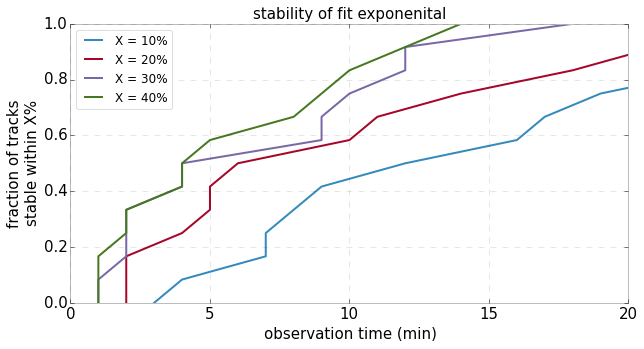

In [36]:
#fig, ax = plt.subplots(figsize=(12, 4))
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(axisbg='white')
ax.grid(b=True, linestyle='--', color='k', alpha=0.2)
# Remove top and right axes lines ("spines")

# spines_to_remove = ['top', 'right']
# for spine in spines_to_remove:
#     ax.spines[spine].set_visible(False)
# spines_to_keep = ['left', 'bottom']
# for spine in spines_to_remove:
#     ax.spines[spine].set_visible(True)

for l, df in zip([10, 20, 30, 40],
                 [stable_10_df, stable_20_df, stable_30_df, stable_40_df]):
    ax.plot(*make_cdf(df['scale-window']), label='X = {l}%'.format(l=l))

plt.title('stability of fit exponenital', fontsize=15)
legend = ax.legend(loc='best', fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('white')

ax.set_ylabel('fraction of tracks\nstable within X%', fontsize=15)
ax.set_xlabel('observation time (min)', fontsize=15)
ax.set_xlim([0, 20])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig('stability-exponential-plot.pdf')
plt.show()

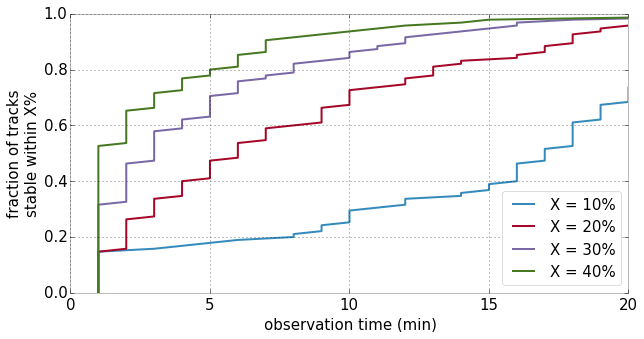

In [364]:
#fig, ax = plt.subplots(figsize=(12, 4))
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(axisbg='white')
for l, df in zip([10, 20, 30, 40],
                 [stable_10_df, stable_20_df, stable_30_df, stable_40_df]):
    ax.plot(*make_cdf(df['mean-window']), label='X = {l}%'.format(l=l))

#plt.title('stability of mean speed', fontsize=15)
legend = ax.legend(loc='best', fontsize=15)
frame = legend.get_frame()
frame.set_facecolor('white')

ax.set_ylabel('fraction of tracks\nstable within X%', fontsize=15)
ax.set_xlabel('observation time (min)', fontsize=15)
ax.set_xlim([0, 20])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig('stability-mean-plot.pdf')
plt.show()

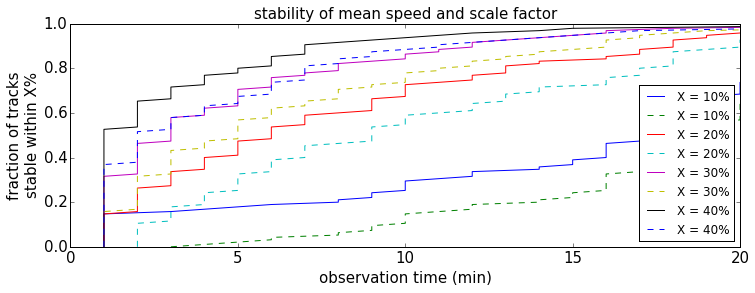

In [107]:
fig, ax = plt.subplots(figsize=(10,5))
for l, df in zip([10, 20, 30, 40],
                 [stable_10_df, stable_20_df, stable_30_df, stable_40_df]):
    ax.plot(*make_cdf(df['mean-window']), label='X = {l}%'.format(l=l))
    ax.plot(*make_cdf(df['scale-window']), linestyle='--', label='X = {l}%'.format(l=l))

plt.title('stability of mean speed and scale factor', fontsize=15)
ax.legend(loc='best', fontsize=12)
ax.set_ylabel('fraction of tracks\nstable within X%', fontsize=15)
ax.set_xlabel('observation time (min)', fontsize=15)
ax.set_xlim([0, 20])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()